# Preliminaries

## Import libraries

In [133]:
import pandas as pd
import numpy as np
import csv
import string
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
from emoji import UNICODE_EMOJI
from nltk.corpus import stopwords
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [ ]:
### TO LOOK FOR HASHTAG OR TAGS import tweepy
#import csv
#import pandas as pd
####input your credentials here
#consumer_key = 'VItwf71MCW7TB6icT6pZKYN2V'
#consumer_secret = 'SIX6ApebSzwK4Lh54eVnfR6Wz4IlJHMfltnEuy68OGuNR9DeeO'
#access_token = '50273262-zjYGGrHiDyQdrY8TigjiPu71nRfEktAuP7mqvKMaK'
#access_token_secret = 'maODpBawd42sG8fC4dpqYgApg8V06PsuE3hY62bNSX33Z'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth,wait_on_rate_limit=True)
#####United Airlines
# Open/Create a file to append data
#csvFile = open('ua.csv', 'a')
#Use csv Writer
#csvWriter = csv.writer(csvFile)

#for tweet in tweepy.Cursor(api.search,q="@matteosalvinimi",count=100,
#                           lang="it",
#                           since="2017-04-03").items():
#    print (tweet.created_at, tweet.text)
#    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

## Get Salvini - Di Maio tweets (not needed aftre first time)

In [139]:
# Consumer keys and access tokens, used for OAuth
consumer_key = 'VItwf71MCW7TB6icT6pZKYN2V'
consumer_secret = 'SIX6ApebSzwK4Lh54eVnfR6Wz4IlJHMfltnEuy68OGuNR9DeeO'
access_token = '50273262-zjYGGrHiDyQdrY8TigjiPu71nRfEktAuP7mqvKMaK'
access_token_secret = 'maODpBawd42sG8fC4dpqYgApg8V06PsuE3hY62bNSX33Z'

# OAuth process, using the keys and tokens
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Creation of the actual interface, using authentication
api = tweepy.API(auth)

collect_tweets_Salvini=[]
collect_tweets_DiMaio=[]

collect_tweets_Salvini=[]
for status in tweepy.Cursor(api.user_timeline, screen_name='@matteosalvinimi').items():
    #Split and re-join to get rid of \n and similar charachters
    temp = status._json['text']
    temp = ' '.join(temp.split())
    collect_tweets_Salvini.append(temp)
    
for status in tweepy.Cursor(api.user_timeline, screen_name='@luigidimaio').items():
    temp = status._json['text']
    temp = ' '.join(temp.split())
    collect_tweets_DiMaio.append(temp)

## And write into .txt file

In [143]:
with open('Salvini.txt', 'w') as f:
    for item in collect_tweets_Salvini:
        f.write("%s\n" % item)
        
        
with open('DiMaio.txt', 'w') as f:
    for item in collect_tweets_DiMaio:
        f.write("%s\n" % item)

## Read from .txt file

In [144]:
tweets_Salvini = []
tweets_DiMaio = []


with open('./Salvini.txt', 'r') as file:
    txt_reader = file.readlines()
    for line in txt_reader:
        tweets_Salvini.append(line)
        
        
with open('./DiMaio.txt', 'r') as file:
    txt_reader = file.readlines()
    for line in txt_reader:
        tweets_DiMaio.append(line)
        

## Defining functions

In [392]:

#List of relevant and frequent emoji
emoji_list = ['😂', '👉🏻','💪','🔴','😊','😞','🤔','✅','🛑','🔵','🙂','👏','😁','😯','😱','😉','😃','📞']



#Get dictionaty keys and values in a list
def return_keys(my_dict):
    return list(my_dict.keys())

def return_values(my_dict):
    return list(my_dict.values())




#Find emoji in a word

def is_emoji(s):
    count = 0
    for emoji in emoji_list:
        count += s.count(emoji)
        if count > 1:
            return False
    return bool(count)


#Clean a word. Ignore the word if some conditions are met
def goodWord(word):
    
    len_ = len(word)
    
    if word =='…' or word[0] == '@' or is_emoji(word) or word =='Salvini' or word =='salvini':
        return False
    elif 'http' in word:
        return False
    elif word == '...':
        return False
    elif word =='RT':
        return False
    elif word[len_-1] in string.punctuation:
        punct = word[len_-1]
        word = word[:len_-1].lower()
        return [word,punct]
    else:
        return word.lower()
    
    
    
#CLEANING A TWEET

def prune_tweet(tweet):
    
    clean_tweet = []
    
    if len(tweet) > 0:
        tweet = tweet.split()
        
        for word in tweet:
            lw = len(word)
            if word != 'rt'  and word[0] != '&' and word !='…':
                if word[0] == '#':
                    word = word[1:]
                elif word[lw-1] == '…':
                    word = word[:lw-1]
                clean_word = goodWord(word)
                if type(clean_word) is list:
                    for item in clean_word:
                        clean_tweet.append(item)
                else:
                    if clean_word != False:
                        clean_tweet.append(clean_word)
    
    return clean_tweet


def tweet_process(tweet):
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in tweet if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    

    temp = [word for word in nopunc.split() if word.lower() not in stopwords.words('italian')]
    
    return ' '.join(temp)


def clean_tweets(tweets_list):
    
    temp = list(map(prune_tweet,tweets_list))
    temp = list(map(lambda x: ' '.join(x), temp))
    temp = list(map(tweet_process, temp))

    
    return temp
        
            

# Part 1: Exploratory Data Anlysis

In [ ]:
#We prune the tweets by using the fucntions above 

In [264]:
clean_Salvini = clean_tweets(tweets_Salvini)
clean_DiMaio = clean_tweets(tweets_DiMaio)

In [265]:
list_words_Salvini = [word for tweet in clean_Salvini for word in tweet.split()]
list_words_DiMaio = [word for tweet in clean_DiMaio for word in tweet.split()]

In [266]:
one_string_Salvini = ''
for item in list_words_Salvini:
    one_string_Salvini = one_string_Salvini + ' '+ item
    
one_string_DiMaio = ''
for item in list_words_DiMaio:
    one_string_DiMaio = one_string_DiMaio + ' '+ item



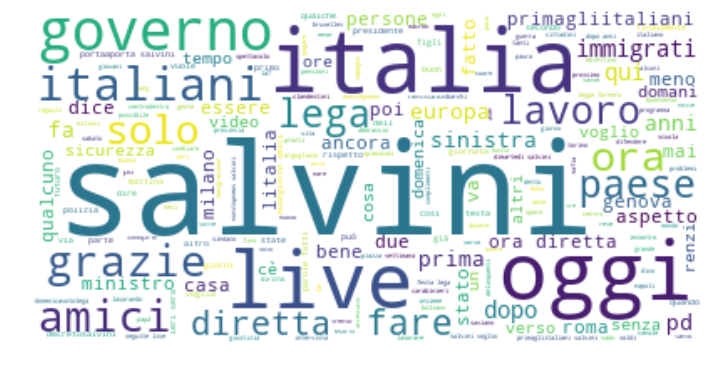

In [267]:
# Create and generate a word cloud image:

one_string_Salvini = ''
for item in list_words_Salvini:
    one_string_Salvini = one_string_Salvini + ' '+ item




wordcloud = WordCloud(background_color='white').generate(one_string_Salvini)

# Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

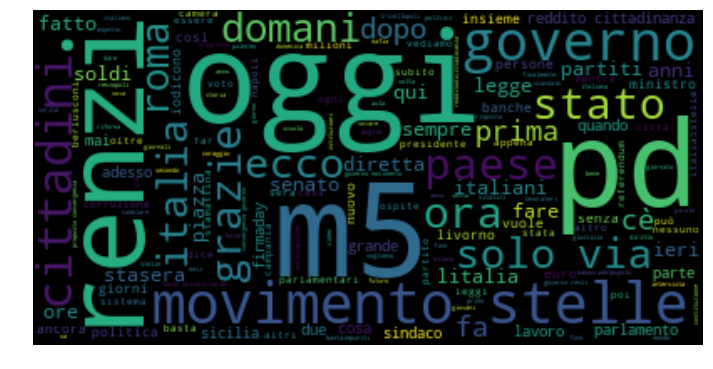

In [461]:
wordcloud = WordCloud().generate(one_string_DiMaio)

# Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [274]:
df_Salvini = pd.DataFrame(list_words_Salvini, columns = ['word'])
df_DiMaio = pd.DataFrame(list_words_DiMaio, columns = ['word'])

In [275]:
top20_Salv_vec = df_Salvini['word'].value_counts(ascending = False).head(20).reset_index()
top_words = list(top20_Salv_vec['index'])
top20_Salv = df_Salvini[df_Salvini['word'].apply(lambda x: x in top_words)]


top20_DM_vec = df_DiMaio['word'].value_counts(ascending = False).head(20).reset_index()
top_words = list(top20_DM_vec['index'])
top20_DM = df_DiMaio[df_DiMaio['word'].apply(lambda x: x in top_words)]

In [477]:
sns.set(font_scale=2)

/Users/manueloffidani/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


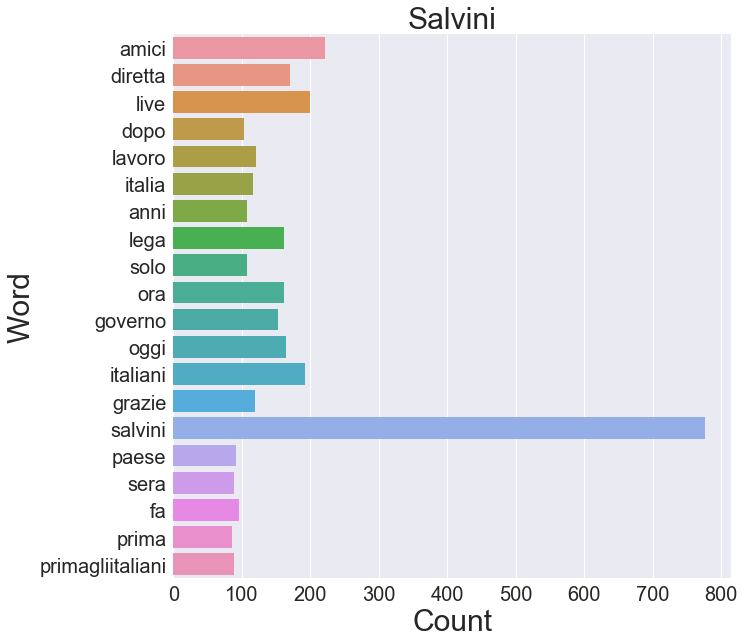

In [479]:
fig = plt.figure(figsize=(10,10))
b = sns.countplot(y ='word', data = top20_Salv )
b.axes.set_title("Salvini",fontsize=30)
b.set_xlabel("Count",fontsize=30)
b.set_ylabel("Word",fontsize=30)
fig.show()

/Users/manueloffidani/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


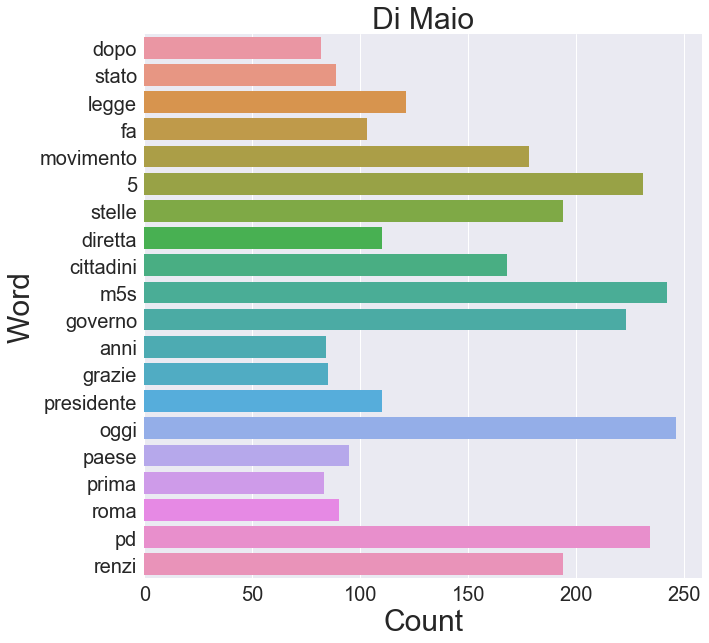

In [480]:
fig = plt.figure(figsize=(10,10))
b = sns.countplot(y ='word', data = top20_DM)
b.axes.set_title("Di Maio",fontsize=30)
b.set_xlabel("Count",fontsize=30)
b.set_ylabel("Word",fontsize=30)
fig.show()

There a huge number of tweets containing the word 'salvini'. How come? 

# What's the most representative tweets by Salvini

In [278]:
top20words_Salvini = list(top20_Salv['word'].unique())

In [279]:
top20words_Salvini

['amici',
 'diretta',
 'live',
 'dopo',
 'lavoro',
 'italia',
 'anni',
 'lega',
 'solo',
 'ora',
 'governo',
 'oggi',
 'italiani',
 'grazie',
 'salvini',
 'paese',
 'sera',
 'fa',
 'prima',
 'primagliitaliani']

In [330]:
best_tweets_Salvini = []
clean_Salvini_temp = clean_Salvini

while len(best_tweets_Salvini)<5:
    max_ = 0
    index = 0
    for i, item in enumerate(clean_Salvini_temp):
        count = 0
        for word in top20words_Salvini:
            count = count + item.split().count(word)
        if count > max_:
            max_ = count
            index = i
        
    best_tweets_Salvini.append(clean_Salvini[index])
    clean_Salvini_temp = clean_Salvini_temp[:index] + clean_Salvini_temp[index+1:]

best_tweets_Salvini    

['ora diretta san giovanni lupatoto provincia verona prima italiani prima lavoro live',
 'salvini penso 5 milioni italiani scappati allestero primi immigrati govern',
 'salvini oggi italiani dopo aver seguito direttive europee dopo ultime manovre meglio peggio wlitalia',
 '28enne burkina faso titolare carta soggiorno precedenti oltraggio resistenza picchia',
 'salvini lavrebbe mai detto giorno stato sindaco leghista pisa massa terni siena viterbo pontida18']

In [335]:
len(best_tweets_Salvini)

5

In [353]:
#key_words_Salvini = [item for tweet in best_tweets_Salvini for item in tweet.split()]

overlap_DM = np.zeros(shape=(len(clean_DiMaio),len(best_tweets_Salvini)))

j=0
for element in best_tweets_Salvini:
    for i, item in enumerate(clean_DiMaio):
        count = 0
        len_ = len(item.split())
        if len_>5:
            for word in element.split():
                count = count + item.split().count(word)
    
                overlap_DM[i,j] = count/len_
    j+=1
        


In [354]:
overlap_DM = pd.DataFrame(overlap_DM, columns=['tweet1','tweet2','tweet3','tweet4','tweet5'])
overlap_DM.head()

,tweet1,tweet2,tweet3,tweet4,tweet5
0,0.0,0.0,0.181818,0.0,0.090909
1,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.000000,0.0,0.000000


In [355]:
overlap_DM.describe()

,tweet1,tweet2,tweet3,tweet4,tweet5
count,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000
mean,0.015850,0.011290,0.015461,0.000111,0.007957
std,0.047981,0.035193,0.044310,0.003181,0.029454
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.363636,0.333333,0.333333,0.111111,0.300000


In [358]:
overlap_DM[overlap_DM['tweet1']==overlap_DM['tweet1'].max()]

,tweet1,tweet2,tweet3,tweet4,tweet5
65,0.363636,0.0,0.0,0.0,0.0
2161,0.363636,0.0,0.0,0.0,0.0


# Markov Chain

In [411]:
def firstMarkov(data):
    markov_model = {}
    
    for line in data:
        for i in range(len(line)):
            markov_model[line[i]] = {}
            
    for line in data:
        for i in range(len(line)-1):
            if(line[i+1]) in markov_model[line[i]]:
                markov_model[line[i]][line[i+1]] +=1
            else:
                 markov_model[line[i]][line[i+1]] =1
                
                
            
    return markov_model


def normalizeFirstMarkov(my_dict):
    
    all_keys = my_dict.keys()
    
    for item in all_keys:
        temp = my_dict[item]
        sum_ = sum(list(temp.values()))
        for subitem in temp.keys():
                temp[subitem] = temp[subitem]/sum_
    
    return my_dict
    
    
def generateSentence(my_dict):
    sentence = []
    
    ml = return_keys(my_dict)
    fw = np.random.choice(ml,1)
    sentence.append(fw[0])
    
    count=0
        
    while count < 3:
        if fw[0] in string.punctuation:
            count +=1
        ml = return_keys(my_dict[fw[0]])
        pr = return_values(my_dict[fw[0]])
        
        if len(ml)>0:
            fw = np.random.choice(ml,1, p = pr)
            sentence.append(fw[0])
        else:
             while len(ml)== 0:
                    #print('k')
                    ml = return_keys(my_dict)
                    fw = np.random.choice(ml,1)
                    
    sentence.append('.')
    
    for item in sentence:
         print(item, sep=' ', end=' ', flush=True)
        
    sentence.append('.')

# Generate for the two

In [431]:
clean_Salvini_WP = list(map(prune_tweet,tweets_Salvini))
clean_DiMaio_WP = list(map(prune_tweet,tweets_DiMaio))

In [432]:
dict_S = firstMarkov(clean_Salvini_WP)
Salvini = normalizeFirstMarkov(dict_S)

dict_DM = firstMarkov(all_tweets_DiMaio)
DiMaio = normalizeFirstMarkov(dict_DM)


In [442]:
generateSentence(Salvini)

pasolini scriveva in italia si è rinchiuso nel suo orgoglio e anti-salvini , dalle 7 mesi del centro di invalidità . questa mattina deve rispettare l’italia , rozzo . 

In [459]:
generateSentence(DiMaio)

mattinata passata stata settimana consulta mozione sfiducia senato pensi… io… m5s ancora posto magico . lista possibili ministri decreto fa monitorato così distinguersi alzare muri dogmatici fomentano dubbi . l'eni gela sicilia... . cittadini . 

In [456]:
s1 = 'pasolini scriveva in italia si è rinchiuso nel suo orgoglio e anti-salvini , dalle 7 mesi del centro di invalidità . questa mattina deve rispettare l’italia , rozzo . '

In [434]:
generateSentence(Salvini)

portano i clandestini , lo dice la sinistra magistr vuole denunciarmi per gli italiani sia agli amici , non è caduto perché stiamo lavorando bene , eccolo . 

In [65]:
all_words = pd.DataFrame([word for line in separated_text for word in line])
all_words.columns = ['word']

In [73]:
set_common_words = ['di','a','da','in','con','su','per','tra','fra','e','i' ,'al', 'il', 'la','lo']

In [80]:
all_words['word']=all_words['word'].apply(lambda x: x if x not in set_common_words else np.nan)
all_words['word']=all_words['word'].apply(lambda x: x if x not in string.punctuation else np.nan)

In [81]:
all_words.dropna(inplace=True)
all_words.head()

,word
0,complimenti
2,presidente
3,trump
6,seggi
7,conquistati


In [82]:
all_words['word'].value_counts()

che                885
salvini            859
non                597
un                 537
è                  455
le                 321
del                291
sono               283
mi                 277
della              271
gli                256
una                241
ci                 235
si                 233
amici              221
dei                217
se                 216
ma                 200
live               196
ha                 195
alla               195
chi                190
italiani           189
ho                 178
più                175
vi                 172
diretta            168
questa             166
anche              164
oggi               164
                  ... 
comitati             1
geniale              1
az                   1
forfetario           1
conoscano            1
chiederà             1
deluderemo           1
soffio               1
apostrof             1
portanti             1
addio                1
(oscar               1
l'affetto  

In [83]:
tw

NameError: name 'tw' is not defined

In [35]:
x = pd.DataFrame(np.random.rand(2,4))

In [47]:
x.iloc[:,0].

AttributeError: 'Series' object has no attribute 'fiter'

In [245]:
for item in my_dict['hello']:
    my_dict['hello'][item] = my_dict['hello'][item]/29
    

In [246]:
my_dict['hello']

{'!': 0.20689655172413793,
 'boys': 0.034482758620689655,
 'from': 0.06896551724137931,
 'mr': 0.13793103448275862,
 'donald': 0.034482758620689655,
 'mr.trump': 0.034482758620689655,
 '-': 0.034482758620689655,
 '"': 0.034482758620689655,
 'to': 0.10344827586206896,
 'for': 0.034482758620689655,
 'umer': 0.034482758620689655,
 '.': 0.10344827586206896,
 'dawn': 0.034482758620689655,
 'and': 0.034482758620689655,
 'sal': 0.034482758620689655,
 'today': 0.034482758620689655}

In [282]:
prob = []

for _ in range(10000):
    x = np.random.choice(['hello', 'my'],1, p = [0.5,0.5])
    prob.append(x[0])
    

In [259]:
import seaborn as sns

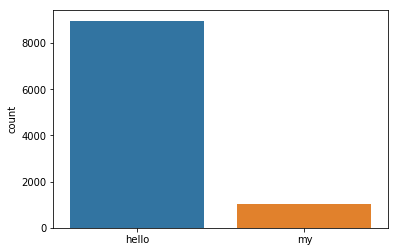

In [280]:
sns.countplot(prob)

In [265]:
prob

['hello',
 'my',
 'hello',
 'hello',
 'my',
 'hello',
 'my',
 'my',
 'my',
 'hello',
 'hello',
 'my',
 'hello',
 'hello',
 'hello',
 'hello',
 'my',
 'my',
 'hello',
 'hello',
 'my',
 'hello',
 'my',
 'hello',
 'hello',
 'hello',
 'my',
 'my',
 'my',
 'my',
 'my',
 'hello',
 'my',
 'hello',
 'hello',
 'hello',
 'my',
 'hello',
 'hello',
 'my',
 'hello',
 'my',
 'my',
 'hello',
 'hello',
 'my',
 'hello',
 'hello',
 'hello',
 'hello',
 'hello',
 'my',
 'my',
 'hello',
 'hello',
 'my',
 'hello',
 'hello',
 'my',
 'hello',
 'my',
 'my',
 'hello',
 'hello',
 'hello',
 'my',
 'my',
 'hello',
 'hello',
 'hello',
 'hello',
 'hello',
 'my',
 'hello',
 'my',
 'my',
 'my',
 'hello',
 'my',
 'hello',
 'hello',
 'hello',
 'my',
 'hello',
 'hello',
 'my',
 'my',
 'hello',
 'my',
 'my',
 'hello',
 'hello',
 'hello',
 'hello',
 'my',
 'my',
 'my',
 'my',
 'hello',
 'hello',
 'hello',
 'hello',
 'hello',
 'hello',
 'hello',
 'my',
 'hello',
 'my',
 'hello',
 'my',
 'my',
 'hello',
 'my',
 'my',
 'my',


# Eda

In [228]:
list_tweets = []
count = 0
for item in tw:
    temp = ' '.join(prune_tweet(item))
    list_tweets.append(' '.join(prune_tweet(temp))) 
    count +=1
#apply prune_tweet twice to remove #Salvini

In [229]:
for tweet_no, tweet in enumerate(list_tweets[:10]):
    print(tweet_no, tweet)
    print('\n')

0 complimenti al presidente trump per i seggi conquistati al senato e la conferma in stati cruciali  , contro tutto e


1 ecco  , mi mancava questa


2 hastatosalvini


3 dopo una luuunga giornata di lavoro fra africa ed italia  , casa  , doccia calda  , ravioli al burro  , un bicchiere di ros


4 a caserta un carabiniere di 34 anni  , emanuele reali  , è stato travolto e ucciso da un treno mentre stava inseguendo


5 ancora in senato per il decreto sicurezza e immigrazione  , che fra poche ore verrà approvato  . la sinistra continua a


6 sono gli ultimi dati aggiornati sugli sbarchi  , ormai siamo a meno 92mila  .


7 mentre gli altri parlano  , noi facciamo  !


8 dopo anni di battaglie della lega a difesa della nostra agricoltura  , questa è la vittoria del made in italy 🇮🇹 e di


9 dopo mesi di lavoro  , arriva il voto finale al senato sul decreto sicurezza e immigrazione  , con il quale vorrei rega




In [255]:
list_tweets = list(map(tweet_process, list_tweets))

In [256]:
list_words = [word for tweet in list_tweets for word in tweet.split()]

In [257]:
df_words = pd.DataFrame(list_words, columns=['tweet'])

In [258]:
df_words.drop_duplicates()

,tweet
0,complimenti
1,presidente
2,trump
3,seggi
4,conquistati
5,senato
6,conferma
7,stati
8,cruciali
9,ecco


In [ ]:
df_words['tweet'].head(20)hist()

In [221]:
df = pd.DataFrame(list_tweets)
df.columns = ['tweet']

In [222]:
df.head()

,tweet
0,complimenti al presidente trump per i seggi co...
1,"ecco , mi mancava questa"
2,hastatosalvini
3,dopo una luuunga giornata di lavoro fra africa...
4,"a caserta un carabiniere di 34 anni , emanuel..."


In [223]:
df['length'] = df['tweet'].apply(len)

In [198]:
df['length'].describe()

count    4580.000000
mean       69.873799
std        41.129332
min         0.000000
25%        32.000000
50%        74.000000
75%       111.000000
max       140.000000
Name: length, dtype: float64

In [201]:
df[df['length'] ==140]['tweet'].iloc[0]

'la guardia di finanza ha sequestrato beni per 19 milioni al clan spada  . grazie  : notizie come questa fanno cominciare bene la giornata  !'

In [ ]:
all_words = pd.DataFrame([word for line in separated_text for word in line])
all_words.columns = ['word']

In [84]:
all_words.describe()

,word
count,41612
unique,8816
top,che
freq,885


In [224]:
from nltk.corpus import stopwords
stopwords.words('italian')[0:10] # Show some stop words

['ad', 'al', 'allo', 'ai', 'agli', 'all', 'agl', 'alla', 'alle', 'con']

In [225]:
def tweet_process(tweet):
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in tweet if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    

    temp = [word for word in nopunc.split() if word.lower() not in stopwords.words('italian')]
    
    return ' '.join(temp)

In [226]:
df['tweet'] = df['tweet'].apply(tweet_process)

In [227]:
df.head()

,tweet,length
0,complimenti presidente trump seggi conquistati...,115
1,ecco mancava,25
2,hastatosalvini,14
3,dopo luuunga giornata lavoro fra africa italia...,123
4,caserta carabiniere 34 anni emanuele reali sta...,118


In [218]:
tweet_process(list_tweets[0])

'complimenti presidente trump seggi conquistati senato conferma stati cruciali'